### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os, sys 
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
hc_df = pd.read_csv("kidney_disease.csv")

In [3]:
hc_df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
hc_df.isnull().sum()/len(hc_df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

### Imputing null values

In [6]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hc_df_imputed = pd.DataFrame(imp_mode.fit_transform(hc_df))

In [7]:
hc_df_imputed

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
hc_df_imputed.columns = hc_df.columns

In [9]:
hc_df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
hc_df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [11]:
for i in hc_df_imputed.columns:
  print("*********************************************************",
        i , 
        "************************************************************")
  print()
  print(set(hc_df_imputed[i].tolist()))
  print()

********************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

In [12]:
hc_df_imputed['rc'].mode()

0    5.2
Name: rc, dtype: object

In [13]:
hc_df_imputed['rc'] = hc_df_imputed['rc'].apply( lambda x:5.2 if x=='\t?' else x)

In [14]:
hc_df_imputed['dm'] = hc_df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
hc_df_imputed['dm'] = hc_df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
hc_df_imputed['dm'] = hc_df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [15]:
hc_df_imputed['bp'] = np.where(hc_df_imputed['bp']==0, hc_df_imputed['bp'].median(), hc_df_imputed['bp'])
hc_df_imputed['hemo'] = np.where(hc_df_imputed['hemo']==0, hc_df_imputed['hemo'].median(), hc_df_imputed['hemo'])

In [16]:
hc_df_imputed['pcv'].mode()

0    41
Name: pcv, dtype: object

In [17]:
hc_df_imputed['pcv'] = hc_df_imputed['pcv'].apply( lambda x:43 if x=='\t43' else x)
hc_df_imputed['pcv'] = hc_df_imputed['pcv'].apply( lambda x:41 if x=='\t?' else x)

In [18]:
hc_df_imputed['wc'].mode()

0    9800
Name: wc, dtype: object

In [19]:
hc_df_imputed['wc'] = hc_df_imputed['wc'].apply( lambda x:9800 if x=='\t?' else x)
hc_df_imputed['wc'] = hc_df_imputed['wc'].apply( lambda x:8400 if x=='\t8400' else x)
hc_df_imputed['wc'] = hc_df_imputed['wc'].apply( lambda x:6200 if x=='\t6200' else x)

In [20]:
hc_df_imputed['cad'] = hc_df_imputed['cad'].apply( lambda x:'no' if x=='\tno' else x)

In [21]:
hc_df_imputed['classification'] = hc_df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [22]:
for i in hc_df_imputed.columns:
  print("*********************************************************",
        i , 
        "************************************************************")
  print()
  print(set(hc_df_imputed[i].tolist()))
  print()

********************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

In [23]:
hc_df_imputed['dm'] = hc_df_imputed['dm'].apply( lambda x:'no' if x=='\tno' else x)

In [24]:
hc_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [25]:
for i in hc_df.select_dtypes(exclude=['object']).columns:
  hc_df_imputed[i] = hc_df_imputed[i].apply(lambda x: float(x))

In [26]:
hc_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

### Because the values of the  Features ['pcv', 'wc' and 'rc' ] are  numeric and the data type is "Object", hence converting it into numeric

In [27]:
hc_df_imputed['pcv'] = pd.to_numeric(hc_df_imputed['pcv'])
hc_df_imputed['wc'] = pd.to_numeric(hc_df_imputed['wc'])
hc_df_imputed['rc'] = pd.to_numeric(hc_df_imputed['rc'])

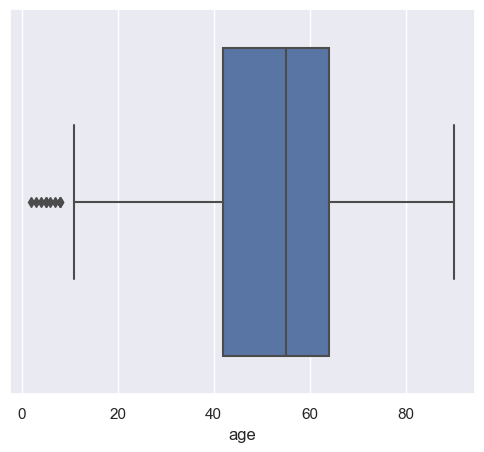

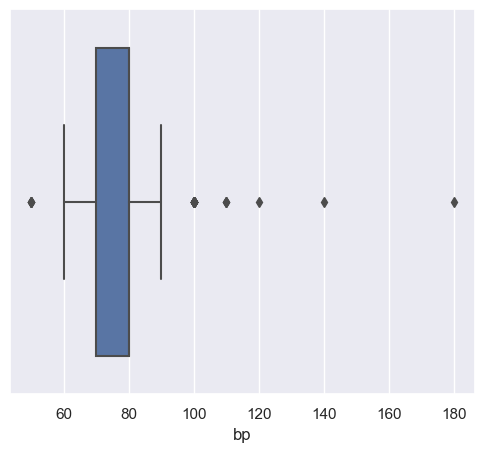

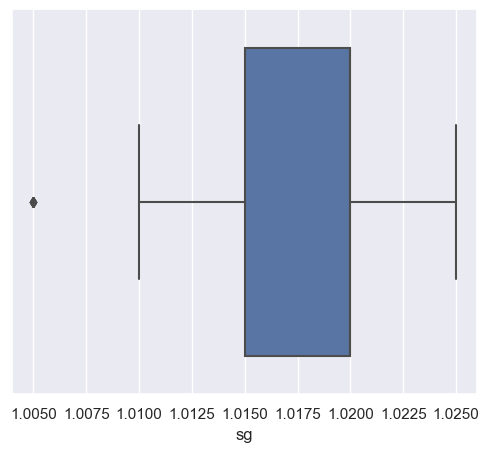

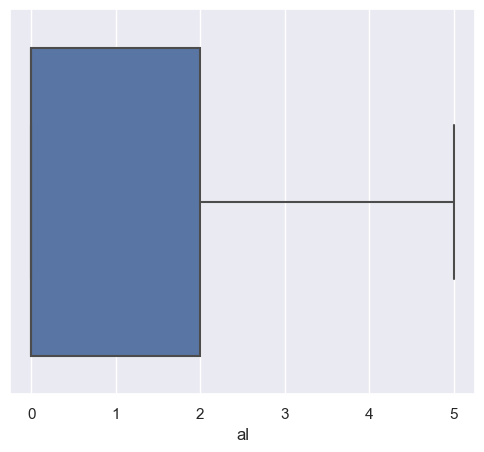

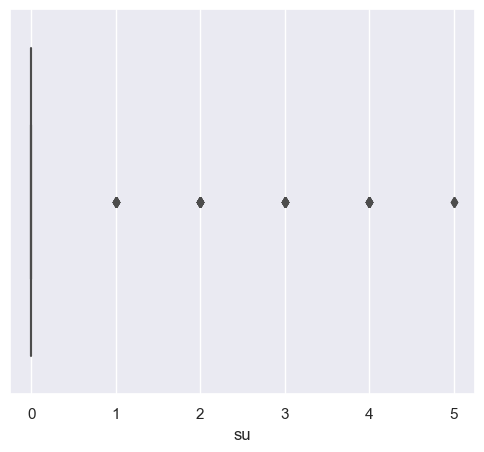

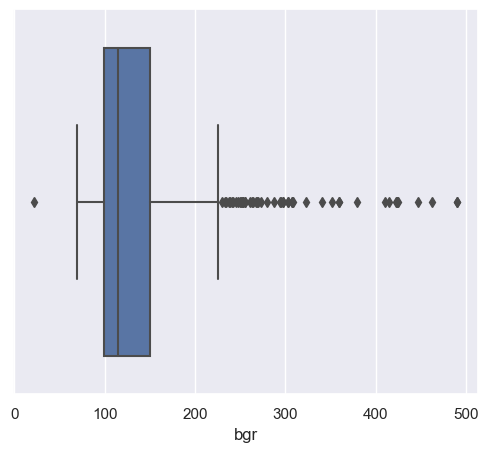

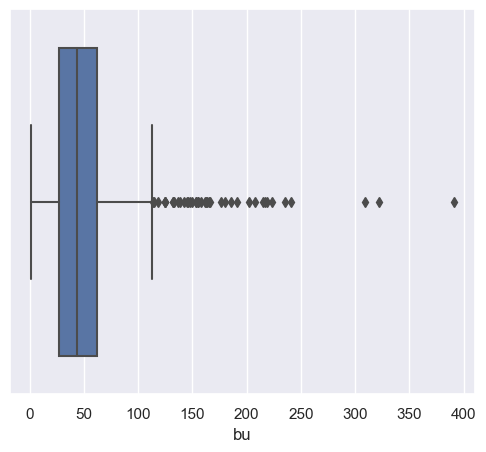

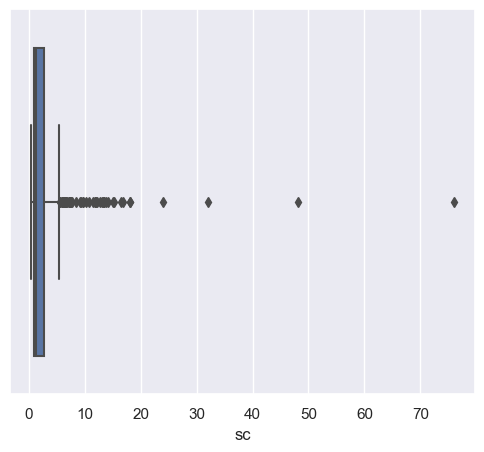

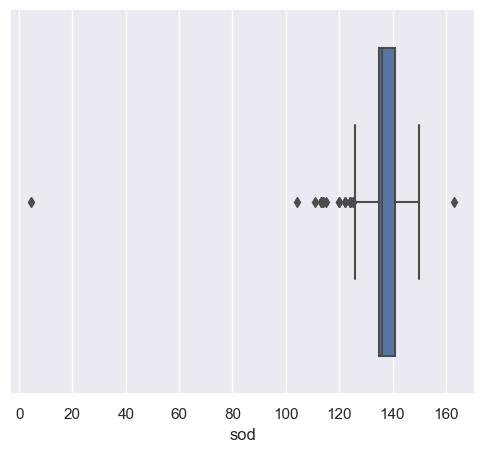

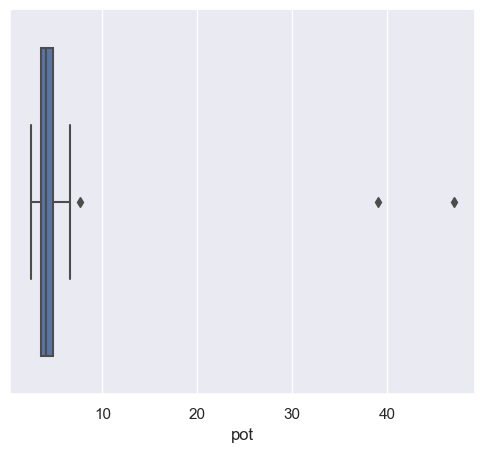

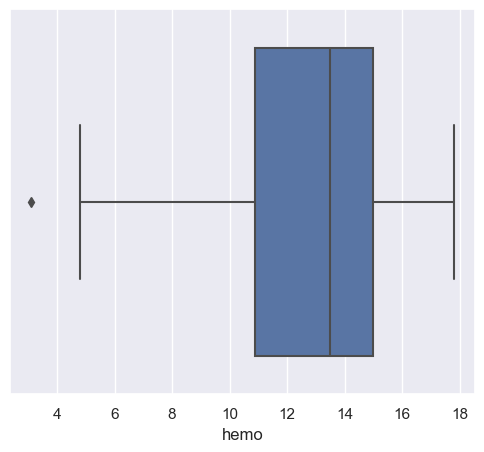

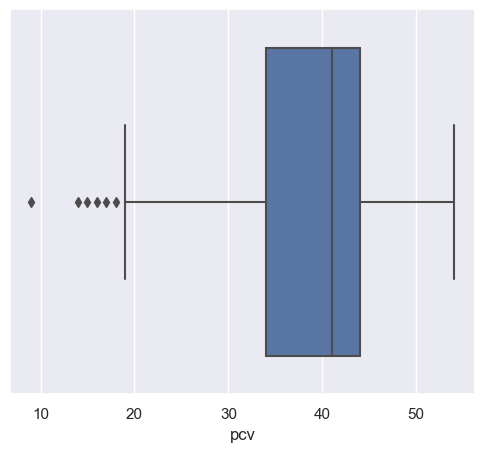

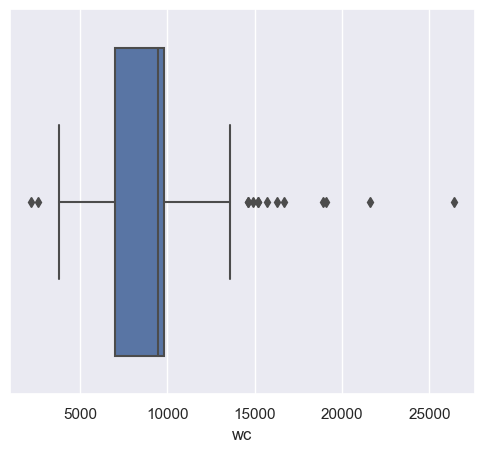

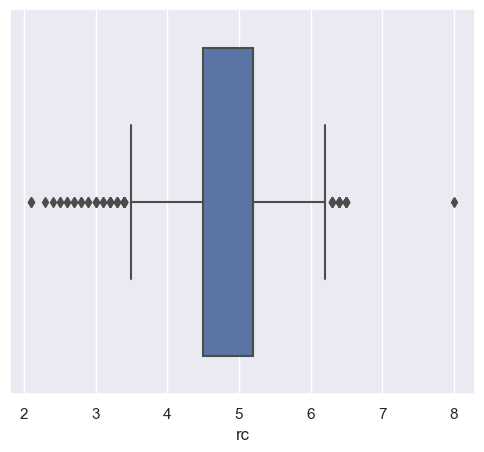

In [28]:
def boxplots(col):
  plt.figure(figsize=(6,5))
  sns.boxplot(hc_df_imputed[col])
  plt.show()

for i in list(hc_df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
  boxplots(i)

- Majority class  Target variable "ckd" is not more than twice that of Minority class "notckd")
- We consider Majority class of the target variable is  more than twice that of Minority class then it's imbalanced data. 

In [29]:
hc_df_imputed['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

### Defiing the Independent and Dependent variables 

In [30]:
X = hc_df_imputed.iloc[:,:-1]
X.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,11.3,38,6000,5.2,no,no,no,good,no,no
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,5.2,no,yes,no,poor,no,yes
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [31]:
Y = hc_df_imputed.iloc[:,-1]

In [32]:
X.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

### One hot encoding using dummies 


In [33]:
X = pd.get_dummies(X, columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], drop_first=True)

In [34]:
X

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,...,1,1,0,0,1,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,...,1,1,0,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,...,1,1,0,0,0,1,0,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,1,0,1,0,1,0,0,1,1,1
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,135.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,1,0,0,0,0,0,0,0,0
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,1,0,0,0,0,0,0,0,0
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,1,0,0,0,0,0,0,0,0
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,1,0,0,0,0,0,0,0,0


In [35]:
X= X.drop(['id'],axis=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          400 non-null    float64
 1   bp           400 non-null    float64
 2   sg           400 non-null    float64
 3   al           400 non-null    float64
 4   su           400 non-null    float64
 5   bgr          400 non-null    float64
 6   bu           400 non-null    float64
 7   sc           400 non-null    float64
 8   sod          400 non-null    float64
 9   pot          400 non-null    float64
 10  hemo         400 non-null    float64
 11  pcv          400 non-null    int64  
 12  wc           400 non-null    int64  
 13  rc           400 non-null    float64
 14  rbc_normal   400 non-null    uint8  
 15  pc_normal    400 non-null    uint8  
 16  pcc_present  400 non-null    uint8  
 17  ba_present   400 non-null    uint8  
 18  htn_yes      400 non-null    uint8  
 19  dm_yes  

### Feauture Scalling 

In [37]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [38]:
Y.head(2)

0    ckd
1    ckd
Name: classification, dtype: object

In [39]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: classification
Non-Null Count  Dtype 
--------------  ----- 
400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [40]:
X.shape

(400, 24)

### Splitting the data using Train and Test Split 

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [43]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#Y_train = le.fit_transform(Y_train)

In [44]:
Model_comparison = {}
list_met = []
list_accuracy = []


# Logistic Regression 
print("\033[5m"+ "LOGISTIC REGRESSION" + "\033[0m\n")
ClfLog = LogisticRegression()
ClfLog.fit(X_train,Y_train)
Y_pred_log = ClfLog.predict(X_test)
Accuracy_Log = accuracy_score(Y_test,Y_pred_log)
print(f"Model Accuracy : {accuracy_score(Y_pred_log,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfLog, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_log,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_log,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Logistic Regression']=[accuracy_score(Y_pred_log,Y_test),f1_score(Y_pred_log,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")

    
print("\033[5m"+ "DECISION TREE" + "\033[0m\n")
# Decision Tree classifier
ClfDt = DecisionTreeClassifier()
ClfDt.fit(X_train,Y_train)
Y_pred_Dt = ClfDt.predict(X_test)
Accuracy_Dt = accuracy_score(Y_test,Y_pred_Dt)
print(f"Model Accuracy : {accuracy_score(Y_pred_Dt,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfDt, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_Dt,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_Dt,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Decsion Tree']=[accuracy_score(Y_pred_Dt,Y_test),f1_score(Y_pred_Dt,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")
      
# Random Forest Classifier 
print("\033[5m"+ "RANDOM FOREST" + "\033[0m\n")
ClfRF = RandomForestClassifier()
ClfRF.fit(X_train,Y_train)
Y_pred_RF = ClfRF.predict(X_test)
Accuracy_RF = accuracy_score(Y_test,Y_pred_RF)
print(f"Model Accuracy : {accuracy_score(Y_pred_RF,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfRF, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_RF,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_RF,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Random Forest']=[accuracy_score(Y_pred_RF,Y_test),f1_score(Y_pred_RF,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")

# Support Vector Machine
print("\033[5m"+ "SUPPORT VECTOR MACHINE" + "\033[0m\n")
ClfSVM = SVC()
ClfSVM.fit(X_train,Y_train)
Y_pred_SVM = ClfSVM.predict(X_test)
Accuracy_SVM = accuracy_score(Y_test,Y_pred_SVM)
print(f"Model Accuracy : {accuracy_score(Y_pred_SVM,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfSVM, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_SVM,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_SVM,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Suppor Vector Machine']=[accuracy_score(Y_pred_SVM,Y_test),f1_score(Y_pred_SVM,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")

# Naive Bayes 
print("\033[5m"+ "NAIVE BAYES" + "\033[0m\n")
ClfNB = GaussianNB()
ClfNB.fit(X_train,Y_train)
Y_pred_NB = ClfNB.predict(X_test)
Accuracy_NB = accuracy_score(Y_test,Y_pred_NB)
print(f"Model Accuracy : {accuracy_score(Y_pred_NB,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfNB, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_NB,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_NB,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Naive Bayes']=[accuracy_score(Y_pred_NB,Y_test),f1_score(Y_pred_NB,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")   

# K-Nearest Neighbors
print("\033[5m"+ "K-NEAREST NEIGHBORS" + "\033[0m\n")
ClfKNN = KNeighborsClassifier()
ClfKNN.fit(X_train,Y_train)
Y_pred_KNN = ClfKNN.predict(X_test)
Accuracy_KNN = accuracy_score(Y_test,Y_pred_KNN)
print(f"Model Accuracy : {accuracy_score(Y_pred_KNN,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfKNN, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_KNN,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_KNN,Y_test,average='weighted')*100:.2f}%")
Model_comparison['K-Nearest Neighbors']=[accuracy_score(Y_pred_KNN,Y_test),f1_score(Y_pred_KNN,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")


print("\033[5m"+ "VOTING" + "\033[0m\n")
Model_VC =  VotingClassifier(estimators=[('Logic', ClfLog),('Decision Tree', ClfDt),('SVM',ClfSVM),('Random Forest',ClfRF),( 'Naive Bayes', ClfNB), ("KNN", ClfKNN),], voting='hard')
Model_VC = Model_VC.fit(X_train,Y_train)#
pred_VC = Model_VC.predict(X_test)
Accuracy_VC = accuracy_score(Y_test, pred_VC)
print(f"Model Accuracy : {accuracy_score(pred_VC,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = Model_VC, X = X_train, y = Y_train,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(pred_VC,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(pred_VC,Y_test,average='weighted')*100:.2f}%")
Model_comparison['Voting']=[accuracy_score(pred_VC,Y_test),f1_score(pred_VC,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")





LOGISTIC REGRESSION

Model Accuracy : 100.00%
Cross Val Accuracy: 98.75 %
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model F1-Score : 100.00%
_________________________________________________________
DECISION TREE

Model Accuracy : 100.00%
Cross Val Accuracy: 96.88 %
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model F1-Score : 100.00%
_________________________________________________________
RANDOM FOREST

Model Accuracy : 100.00

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [47]:
# Xgboost
from xgboost import XGBClassifier
print("\033[5m"+ "XGBOOST" + "\033[0m\n")
ClfXg = XGBClassifier()
ClfXg.fit(X_train,Y_train)
Y_pred_Xg = ClfXg.predict(X_test)
Y_pred_Xg = le.inverse_transform(Y_pred_Xg)
Accuracy_Xg = accuracy_score(Y_test,Y_pred_Xg)
print(f"Model Accuracy : {accuracy_score(Y_pred_Xg,Y_test)*100:.2f}%")
accuracies = cross_val_score(estimator = ClfXg, X = X_train, y=Y_train ,cv=5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print(classification_report(Y_pred_Xg,Y_test,zero_division=1))
print(f"Model F1-Score : {f1_score(Y_pred_Xg,Y_test,average='weighted')*100:.2f}%")
Model_comparison['XGBoost']=[accuracy_score(Y_pred_Xg,Y_test),f1_score(Y_pred_Xg,Y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]
print("_________________________________________________________")


XGBOOST

Model Accuracy : 100.00%
Cross Val Accuracy: 99.06 %
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model F1-Score : 100.00%
_________________________________________________________


              Method Used  Accuracy
0      LogisticRegression    1.0000
1            DecisionTree    1.0000
2            RandomForest    1.0000
3  Support Vector Machine    0.9875
4     K Nearest Neighbors    0.9625
5     Naive Bayes Theorem    0.9875
6                 XGBoost    1.0000
7                  Voting    1.0000
AxesSubplot(0.125,0.11;0.775x0.77)


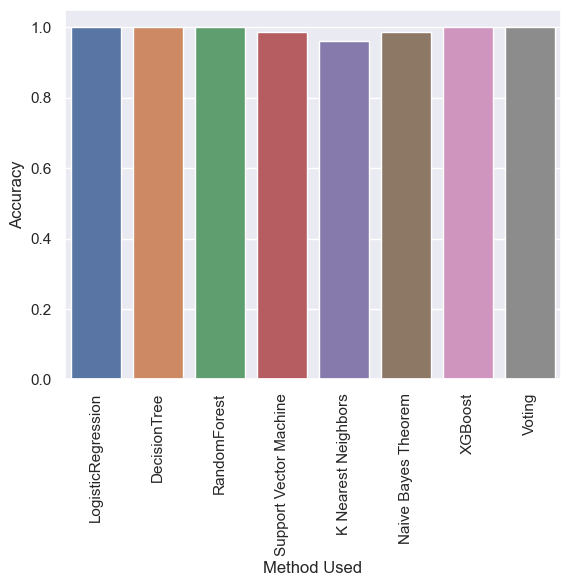

In [48]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Support Vector Machine','K Nearest Neighbors','Naive Bayes Theorem','XGBoost','Voting']

list2 = [Accuracy_Log, Accuracy_Dt, Accuracy_RF, Accuracy_SVM, Accuracy_KNN, Accuracy_NB,Accuracy_Xg, Accuracy_VC]

list3 = [ClfLog, ClfDt, ClfRF, ClfSVM, ClfKNN, ClfNB, ClfXg, Model_VC]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)


chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


In [49]:
Model_com_df=pd.DataFrame(Model_comparison).T
print(Model_com_df)
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy', 'CV Standard']
Model_com_df=Model_com_df.sort_values(by=['Model F1-Score','CV Accuracy'],ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

                            0         1         2         3
Logistic Regression    1.0000  1.000000  0.987500  0.011693
Decsion Tree           1.0000  1.000000  0.968750  0.040745
Random Forest          1.0000  1.000000  1.000000  0.000000
Suppor Vector Machine  0.9875  0.987451  0.987500  0.011693
Naive Bayes            0.9875  0.987451  0.959375  0.021195
K-Nearest Neighbors    0.9625  0.962104  0.968750  0.017116
Voting                 1.0000  1.000000  0.993750  0.012500
XGBoost                1.0000  1.000000  0.990625  0.007655


,Model Accuracy,Model F1-Score,CV Accuracy,CV Standard
Random Forest,100.00%,100.00%,100.00%,0.00%
Voting,100.00%,100.00%,99.38%,1.25%
XGBoost,100.00%,100.00%,99.06%,0.77%
Logistic Regression,100.00%,100.00%,98.75%,1.17%
Decsion Tree,100.00%,100.00%,96.88%,4.07%
Suppor Vector Machine,98.75%,98.75%,98.75%,1.17%
Naive Bayes,98.75%,98.75%,95.94%,2.12%
K-Nearest Neighbors,96.25%,96.21%,96.88%,1.71%
